In [101]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.dataset as pads
import os

pd.set_option('display.max_columns', None)

labeled = pd.read_csv('all_labeled_plays.csv')
labeled

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,baserunner_player_id,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,safe_probability,let,cut_hold,cut_relay,optimal_action
0,y1_d001_CGA_QEA,108,4098455,8,center field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1824,CGA-1929,CGA-1592,CGA-2010,-110.8791,230.5518,94.4808,338.4810,65.4084,291.4254,35.7615,110.5899,-44.5356,100.8936,-62.0019,65.0769,95.34480,339.4440,0.000000,0.102619,114.200733,10,Home,2B,True,True,35.7615,110.5899,39.346871,94.4808,338.4810,231.626499,CGA-1824,CGA-1824,7.0,28.322210,27.656672,0.996948,3.028173,3.253,3.154183,let
1,y1_d001_CGA_QEA,114,4231155,9,right field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1353,CGA-1824,CGA-1929,CGA-1592,-121.0008,236.3949,28.4658,327.7230,139.5966,299.0814,61.1802,61.2882,NaN,NaN,NaN,NaN,138.17340,295.9152,5.194530,0.102367,107.931899,10,Home,2B,True,True,61.1802,61.2882,89.783392,139.5966,299.0814,221.583436,CGA-1353,CGA-1353,3.0,23.617302,22.445863,0.978368,0.564000,0.564,0.553682,cut_hold
2,y1_d001_CGA_QEA,216,8333280,9,right field,ball acquired,QEA,CGA,top,QEA-0152,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1929,CGA-1592,CGA-1547,NaN,-119.2062,233.3106,-29.9289,274.1229,188.1207,245.4093,56.9868,46.3326,NaN,NaN,-50.5641,38.5989,188.00880,246.3627,0.000000,0.102367,107.931899,10,Home,2B,True,True,56.9868,46.3326,98.766010,188.1207,245.4093,222.283963,CGA-1929,CGA-1929,3.0,28.405855,27.655517,0.812507,1.563890,1.564,1.474566,cut_relay
3,y1_d002_CGA_QEA,92,3087421,7,left field,ball acquired,QEA,CGA,bottom,CGA-2074,CGA-1127,CGA-1592,CGA-1824,CGA-1198,CGA-2010,CGA-1353,CGA-1458,CGA-1547,QEA-0252,QEA-0235,QEA-0120,NaN,-200.5506,236.1000,-61.6011,276.9882,113.8962,207.5649,57.1884,47.2554,-6.3957,122.2593,-57.1140,67.5888,-201.44550,237.1629,0.000000,0.085549,94.428842,10,Home,2B,True,True,57.1884,47.2554,98.131108,-200.5506,236.1000,228.305395,QEA-0252,QEA-0252,27.0,28.366512,24.333189,0.928305,2.245454,2.253,1.818625,cut_relay
4,y1_d003_CGA_QEA,92,3994106,9,right field,ball acquired,QEA,CGA,bottom,CGA-1302,CGA-1503,CGA-1592,CGA-1458,CGA-1166,CGA-2010,CGA-1824,CGA-1547,CGA-1198,QEA-0249,QEA-0365,NaN,NaN,-136.9167,241.8789,51.5217,335.9463,69.6903,327.1002,59.4930,72.1209,NaN,NaN,NaN,NaN,67.77840,325.8180,0.011808,0.094821,99.976237,10,Home,2B,True,True,59.4930,72.1209,80.939068,69.6903,327.1002,211.888716,QEA-0249,QEA-0249,49.0,27.627580,26.671594,0.958351,0.564000,0.564,0.544133,cut_hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,y2_d094_QZE_RZQ,341,11657364,8,center field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1245,QZE-2280,QZE-1638,QZE-2217,RZQ-0310,RZQ-0275,RZQ-0231,NaN,-97.8660,261.7449,-2.0037,243.5127,118.4931,246.9180,47.1309,35.7042,1.6380,124.4088,-61.2816,60.3006,-3.23607,247.2696,-0.501801,0.071692,79.783048,12,2B,Home,True,True,-61.2816,60.3006,85.974397,-2.0037,243.5127,243.520943,RZQ-0231,RZQ-0231,77.0,28.361251,26.829093,0.951756,1.797885,1.873,1.511510,cut_relay
1530,y2_d094_QZE_RZQ,344,11857564,9,right field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1

In [102]:
cuts = pd.read_csv('cutoff_decisions.csv')
with_obs = labeled.merge(cuts, on=['game_str', 'play_id'], how='left')
with_obs

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,baserunner_player_id,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,safe_probability,let,cut_hold,cut_relay,optimal_action,cutoff_man,cutoff_decision
0,y1_d001_CGA_QEA,108,4098455,8,center field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1824,CGA-1929,CGA-1592,CGA-2010,-110.8791,230.5518,94.4808,338.4810,65.4084,291.4254,35.7615,110.5899,-44.5356,100.8936,-62.0019,65.0769,95.34480,339.4440,0.000000,0.102619,114.200733,10,Home,2B,True,True,35.7615,110.5899,39.346871,94.4808,338.4810,231.626499,CGA-1824,CGA-1824,7.0,28.322210,27.656672,0.996948,3.028173,3.253,3.154183,let,second baseman,cut_relay
1,y1_d001_CGA_QEA,114,4231155,9,right field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1353,CGA-1824,CGA-1929,CGA-1592,-121.0008,236.3949,28.4658,327.7230,139.5966,299.0814,61.1802,61.2882,NaN,NaN,NaN,NaN,138.17340,295.9152,5.194530,0.102367,107.931899,10,Home,2B,True,True,61.1802,61.2882,89.783392,139.5966,299.0814,221.583436,CGA-1353,CGA-1353,3.0,23.617302,22.445863,0.978368,0.564000,0.564,0.553682,cut_hold,second baseman,cut_hold
2,y1_d001_CGA_QEA,216,8333280,9,right field,ball acquired,QEA,CGA,top,QEA-0152,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1929,CGA-1592,CGA-1547,NaN,-119.2062,233.3106,-29.9289,274.1229,188.1207,245.4093,56.9868,46.3326,NaN,NaN,-50.5641,38.5989,188.00880,246.3627,0.000000,0.102367,107.931899,10,Home,2B,True,True,56.9868,46.3326,98.766010,188.1207,245.4093,222.283963,CGA-1929,CGA-1929,3.0,28.405855,27.655517,0.812507,1.563890,1.564,1.474566,cut_relay,shortstop,cut_hold
3,y1_d002_CGA_QEA,92,3087421,7,left field,ball acquired,QEA,CGA,bottom,CGA-2074,CGA-1127,CGA-1592,CGA-1824,CGA-1198,CGA-2010,CGA-1353,CGA-1458,CGA-1547,QEA-0252,QEA-0235,QEA-0120,NaN,-200.5506,236.1000,-61.6011,276.9882,113.8962,207.5649,57.1884,47.2554,-6.3957,122.2593,-57.1140,67.5888,-201.44550,237.1629,0.000000,0.085549,94.428842,10,Home,2B,True,True,57.1884,47.2554,98.131108,-200.5506,236.1000,228.305395,QEA-0252,QEA-0252,27.0,28.366512,24.333189,0.928305,2.245454,2.253,1.818625,cut_relay,shortstop,cut_relay
4,y1_d003_CGA_QEA,92,3994106,9,right field,ball acquired,QEA,CGA,bottom,CGA-1302,CGA-1503,CGA-1592,CGA-1458,CGA-1166,CGA-2010,CGA-1824,CGA-1547,CGA-1198,QEA-0249,QEA-0365,NaN,NaN,-136.9167,241.8789,51.5217,335.9463,69.6903,327.1002,59.4930,72.1209,NaN,NaN,NaN,NaN,67.77840,325.8180,0.011808,0.094821,99.976237,10,Home,2B,True,True,59.4930,72.1209,80.939068,69.6903,327.1002,211.888716,QEA-0249,QEA-0249,49.0,27.627580,26.671594,0.958351,0.564000,0.564,0.544133,cut_hold,second baseman,cut_hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,y2_d094_QZE_RZQ,341,11657364,8,center field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1245,QZE-2280,QZE-1638,QZE-2217,RZQ-0310,RZQ-0275,RZQ-0231,NaN,-97.8660,261.7449,-2.0037,243.5127,118.4931,246.9180,47.1309,35.7042,1.6380,124.4088,-61.2816,60.3006,-3.23607,247.2696,-0.501801,0.071692,79.783048,12,2B,Home,True,True,-61.2816,60.3006,85.974397,-2.0037,243.5127,243.520943,RZQ-0231,RZQ-0231,77.0,28.361251,26.829093,0.951

In [83]:
# def assigned_base(cutoff_man):

#     mapping = {
#         'first baseman': '1B',
#         'second baseman': '2B',
#         'third baseman': '3B',
#         'shortstop': None,
#         'pitcher': None,
#         'catcher': 'Home'
#     }
#     return mapping.get(cutoff_man, None)

# mask = (with_obs['cutoff_decision'] == 'cut and hold') & (
#     with_obs['to_base'] == with_obs['cutoff_man'].map(assigned_base)
# )

# with_obs.loc[mask, 'cutoff_decision'] = 'cut and tag'
# # Find all (game_str, play_id) where the mask is True
# plays_to_update = with_obs.loc[mask, ['game_str', 'play_id']].drop_duplicates()

# # Update cutoff_decision for all rows in those plays
# for _, row in plays_to_update.iterrows():
#     idx = (with_obs['game_str'] == row['game_str']) & (with_obs['play_id'] == row['play_id'])
#     with_obs.loc[idx & (with_obs['cutoff_decision'] == 'cut and hold'), 'cutoff_decision'] = 'cut and tag'

# with_obs['cutoff_decision'].value_counts()

In [4]:
data_path = "/Users/pranavrajaram/SMT-Data-Challenge-2025"
def readDataSubset(table_type, data_path):
    """
    Loads a specified SMT data subset as a PyArrow dataset.
    """
    valid_tables = ['ball_pos', 'game_events', 'game_info', 'player_pos', 'rosters']
    if table_type not in valid_tables:
        print("Invalid data subset name. Please try again with a valid data subset.")
        return None

    if table_type == 'rosters':
        return pads.dataset(source=os.path.join(data_path, 'rosters.csv'), format='csv')
    else:
        
        return pads.dataset(
            source=os.path.join(data_path, table_type),
            format='csv'
        )

ball_pos_ds = readDataSubset('ball_pos', data_path)
player_pos_ds = readDataSubset('player_pos', data_path)

In [5]:
ball_pos_df = ball_pos_ds.to_table().to_pandas()
player_pos_df = player_pos_ds.to_table().to_pandas()

In [6]:
position_key = pd.DataFrame({
    "cut_code": [*range(1, 14), 255, 14, 15, 16, 17, 18, 19],
    "cut_position": [
        "pitcher", "catcher", "first baseman", "second baseman", "third baseman",
        "shortstop", "left field", "center field", "right field", "batter",
        "runner on first base", "runner on second base", "runner on third base",
        "ball event with no player (e.g., ball bounce)", "home plate umpire",
        "field umpire", "field umpire", "field umpire",
        "first base coach", "third base coach"
    ]
})

player_pos = player_pos_df.merge(
    position_key, left_on='player_position', right_on='cut_code', how='left').drop(
    columns=['player_position'])

player_pos

,game_str,play_id,timestamp,field_x,field_y,cut_code,cut_position
0,y1_d069_ACN_QEA,1,14853,0.6102,58.6314,1,pitcher
1,y1_d069_ACN_QEA,1,14853,1.7643,-6.4374,2,catcher
2,y1_d069_ACN_QEA,1,14853,69.9423,98.1246,3,first baseman
3,y1_d069_ACN_QEA,1,14853,37.2924,146.9091,4,second baseman
4,y1_d069_ACN_QEA,1,14853,-66.9441,86.1147,5,third baseman
...,...,...,...,...,...,...,...
76350334,y1_d058_WZR_YJD,330,12033008,94.1688,194.3637,9,right field
76350335,y1_d058_WZR_YJD,330,12033008,46.8339,87.3768,10,batter
76350336,y1_d058_WZR_YJD,330,12033008,-0.2910,120.6429,11,runner on first base
76350337,y1_d058_WZR_YJD,330,12033008,0.1224,-1.6680,12,runner on second base


In [103]:
everything_df = with_obs.merge(
    player_pos,
    left_on=['game_str', 'play_id', 'timestamp', 'cutoff_man'],
    right_on=['game_str', 'play_id', 'timestamp', 'cut_position'],
    how='left'
).rename(
    columns={
        'field_x': 'cutoff_x', 
        'field_y': 'cutoff_y'
    }
).drop(columns=['cut_position'])

everything_df

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,baserunner_player_id,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,safe_probability,let,cut_hold,cut_relay,optimal_action,cutoff_man,cutoff_decision,cutoff_x,cutoff_y,cut_code
0,y1_d001_CGA_QEA,108,4098455,8,center field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1824,CGA-1929,CGA-1592,CGA-2010,-110.8791,230.5518,94.4808,338.4810,65.4084,291.4254,35.7615,110.5899,-44.5356,100.8936,-62.0019,65.0769,95.34480,339.4440,0.000000,0.102619,114.200733,10,Home,2B,True,True,35.7615,110.5899,39.346871,94.4808,338.4810,231.626499,CGA-1824,CGA-1824,7.0,28.322210,27.656672,0.996948,3.028173,3.253,3.154183,let,second baseman,cut_relay,41.7405,194.3859,4
1,y1_d001_CGA_QEA,114,4231155,9,right field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1353,CGA-1824,CGA-1929,CGA-1592,-121.0008,236.3949,28.4658,327.7230,139.5966,299.0814,61.1802,61.2882,NaN,NaN,NaN,NaN,138.17340,295.9152,5.194530,0.102367,107.931899,10,Home,2B,True,True,61.1802,61.2882,89.783392,139.5966,299.0814,221.583436,CGA-1353,CGA-1353,3.0,23.617302,22.445863,0.978368,0.564000,0.564,0.553682,cut_hold,second baseman,cut_hold,25.8921,137.6235,4
2,y1_d001_CGA_QEA,216,8333280,9,right field,ball acquired,QEA,CGA,top,QEA-0152,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1929,CGA-1592,CGA-1547,NaN,-119.2062,233.3106,-29.9289,274.1229,188.1207,245.4093,56.9868,46.3326,NaN,NaN,-50.5641,38.5989,188.00880,246.3627,0.000000,0.102367,107.931899,10,Home,2B,True,True,56.9868,46.3326,98.766010,188.1207,245.4093,222.283963,CGA-1929,CGA-1929,3.0,28.405855,27.655517,0.812507,1.563890,1.564,1.474566,cut_relay,shortstop,cut_hold,11.6007,132.4140,6
3,y1_d002_CGA_QEA,92,3087421,7,left field,ball acquired,QEA,CGA,bottom,CGA-2074,CGA-1127,CGA-1592,CGA-1824,CGA-1198,CGA-2010,CGA-1353,CGA-1458,CGA-1547,QEA-0252,QEA-0235,QEA-0120,NaN,-200.5506,236.1000,-61.6011,276.9882,113.8962,207.5649,57.1884,47.2554,-6.3957,122.2593,-57.1140,67.5888,-201.44550,237.1629,0.000000,0.085549,94.428842,10,Home,2B,True,True,57.1884,47.2554,98.131108,-200.5506,236.1000,228.305395,QEA-0252,QEA-0252,27.0,28.366512,24.333189,0.928305,2.245454,2.253,1.818625,cut_relay,shortstop,cut_relay,-55.6794,140.5182,6
4,y1_d003_CGA_QEA,92,3994106,9,right field,ball acquired,QEA,CGA,bottom,CGA-1302,CGA-1503,CGA-1592,CGA-1458,CGA-1166,CGA-2010,CGA-1824,CGA-1547,CGA-1198,QEA-0249,QEA-0365,NaN,NaN,-136.9167,241.8789,51.5217,335.9463,69.6903,327.1002,59.4930,72.1209,NaN,NaN,NaN,NaN,67.77840,325.8180,0.011808,0.094821,99.976237,10,Home,2B,True,True,59.4930,72.1209,80.939068,69.6903,327.1002,211.888716,QEA-0249,QEA-0249,49.0,27.627580,26.671594,0.958351,0.564000,0.564,0.544133,cut_hold,second baseman,cut_hold,18.4110,161.4603,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,y2_d094_QZE_RZQ,341,11657364,8,center field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1245,QZE-2280,QZE-1638,QZE-2217,RZQ-0310,RZQ-0275,RZQ-0231,NaN,-97.8660,261.7449,-2.0037,243.5127,118.4931,246.9180,47.1309,35.7042,1.6380,124.4088,-61.2816,60.3006,-3.23607,247.2696,-0.501801,0.071692

In [104]:
base_coords = {
    '3B': (-63.64, 63.64),
    'Home': (0, 0),
    '2B': (0, 127)
}

def compute_cutoff_distance(row):
    bx, by = base_coords.get(row['to_base'], (np.nan, np.nan))
    return np.sqrt((row['cutoff_x'] - bx)**2 + (row['cutoff_y'] - by)**2)

everything_df['cutoff_dist_to_base'] = everything_df.apply(compute_cutoff_distance, axis=1)
everything_df

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,baserunner_player_id,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,safe_probability,let,cut_hold,cut_relay,optimal_action,cutoff_man,cutoff_decision,cutoff_x,cutoff_y,cut_code,cutoff_dist_to_base
0,y1_d001_CGA_QEA,108,4098455,8,center field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1824,CGA-1929,CGA-1592,CGA-2010,-110.8791,230.5518,94.4808,338.4810,65.4084,291.4254,35.7615,110.5899,-44.5356,100.8936,-62.0019,65.0769,95.34480,339.4440,0.000000,0.102619,114.200733,10,Home,2B,True,True,35.7615,110.5899,39.346871,94.4808,338.4810,231.626499,CGA-1824,CGA-1824,7.0,28.322210,27.656672,0.996948,3.028173,3.253,3.154183,let,second baseman,cut_relay,41.7405,194.3859,4,79.266190
1,y1_d001_CGA_QEA,114,4231155,9,right field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1353,CGA-1824,CGA-1929,CGA-1592,-121.0008,236.3949,28.4658,327.7230,139.5966,299.0814,61.1802,61.2882,NaN,NaN,NaN,NaN,138.17340,295.9152,5.194530,0.102367,107.931899,10,Home,2B,True,True,61.1802,61.2882,89.783392,139.5966,299.0814,221.583436,CGA-1353,CGA-1353,3.0,23.617302,22.445863,0.978368,0.564000,0.564,0.553682,cut_hold,second baseman,cut_hold,25.8921,137.6235,4,27.986775
2,y1_d001_CGA_QEA,216,8333280,9,right field,ball acquired,QEA,CGA,top,QEA-0152,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1929,CGA-1592,CGA-1547,NaN,-119.2062,233.3106,-29.9289,274.1229,188.1207,245.4093,56.9868,46.3326,NaN,NaN,-50.5641,38.5989,188.00880,246.3627,0.000000,0.102367,107.931899,10,Home,2B,True,True,56.9868,46.3326,98.766010,188.1207,245.4093,222.283963,CGA-1929,CGA-1929,3.0,28.405855,27.655517,0.812507,1.563890,1.564,1.474566,cut_relay,shortstop,cut_hold,11.6007,132.4140,6,12.801861
3,y1_d002_CGA_QEA,92,3087421,7,left field,ball acquired,QEA,CGA,bottom,CGA-2074,CGA-1127,CGA-1592,CGA-1824,CGA-1198,CGA-2010,CGA-1353,CGA-1458,CGA-1547,QEA-0252,QEA-0235,QEA-0120,NaN,-200.5506,236.1000,-61.6011,276.9882,113.8962,207.5649,57.1884,47.2554,-6.3957,122.2593,-57.1140,67.5888,-201.44550,237.1629,0.000000,0.085549,94.428842,10,Home,2B,True,True,57.1884,47.2554,98.131108,-200.5506,236.1000,228.305395,QEA-0252,QEA-0252,27.0,28.366512,24.333189,0.928305,2.245454,2.253,1.818625,cut_relay,shortstop,cut_relay,-55.6794,140.5182,6,57.296922
4,y1_d003_CGA_QEA,92,3994106,9,right field,ball acquired,QEA,CGA,bottom,CGA-1302,CGA-1503,CGA-1592,CGA-1458,CGA-1166,CGA-2010,CGA-1824,CGA-1547,CGA-1198,QEA-0249,QEA-0365,NaN,NaN,-136.9167,241.8789,51.5217,335.9463,69.6903,327.1002,59.4930,72.1209,NaN,NaN,NaN,NaN,67.77840,325.8180,0.011808,0.094821,99.976237,10,Home,2B,True,True,59.4930,72.1209,80.939068,69.6903,327.1002,211.888716,QEA-0249,QEA-0249,49.0,27.627580,26.671594,0.958351,0.564000,0.564,0.544133,cut_hold,second baseman,cut_hold,18.4110,161.4603,4,39.070157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,y2_d094_QZE_RZQ,341,11657364,8,center field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1245,QZE-2280,QZE-1638,QZE-2217,RZQ-0310,RZQ-0275,RZQ-0231,NaN,-97.8660,261.7449,-2.0037,243.5127,118.4931,246.9180,47.1309,35.

In [105]:
def get_baserunner_id(row):
    if row['from_base'] == 'Home':
        return row['batter']
    elif row['from_base'] == '1B':
        return row['first_baserunner']
    elif row['from_base'] == '2B':
        return row['second_baserunner']
    else:
        return None

everything_df['baserunner_player_id'] = everything_df.apply(get_baserunner_id, axis=1)
everything_df

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,baserunner_player_id,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,safe_probability,let,cut_hold,cut_relay,optimal_action,cutoff_man,cutoff_decision,cutoff_x,cutoff_y,cut_code,cutoff_dist_to_base
0,y1_d001_CGA_QEA,108,4098455,8,center field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1824,CGA-1929,CGA-1592,CGA-2010,-110.8791,230.5518,94.4808,338.4810,65.4084,291.4254,35.7615,110.5899,-44.5356,100.8936,-62.0019,65.0769,95.34480,339.4440,0.000000,0.102619,114.200733,10,Home,2B,True,True,35.7615,110.5899,39.346871,94.4808,338.4810,231.626499,CGA-1824,CGA-1824,7.0,28.322210,27.656672,0.996948,3.028173,3.253,3.154183,let,second baseman,cut_relay,41.7405,194.3859,4,79.266190
1,y1_d001_CGA_QEA,114,4231155,9,right field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1353,CGA-1824,CGA-1929,CGA-1592,-121.0008,236.3949,28.4658,327.7230,139.5966,299.0814,61.1802,61.2882,NaN,NaN,NaN,NaN,138.17340,295.9152,5.194530,0.102367,107.931899,10,Home,2B,True,True,61.1802,61.2882,89.783392,139.5966,299.0814,221.583436,CGA-1353,CGA-1353,3.0,23.617302,22.445863,0.978368,0.564000,0.564,0.553682,cut_hold,second baseman,cut_hold,25.8921,137.6235,4,27.986775
2,y1_d001_CGA_QEA,216,8333280,9,right field,ball acquired,QEA,CGA,top,QEA-0152,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1929,CGA-1592,CGA-1547,NaN,-119.2062,233.3106,-29.9289,274.1229,188.1207,245.4093,56.9868,46.3326,NaN,NaN,-50.5641,38.5989,188.00880,246.3627,0.000000,0.102367,107.931899,10,Home,2B,True,True,56.9868,46.3326,98.766010,188.1207,245.4093,222.283963,CGA-1929,CGA-1929,3.0,28.405855,27.655517,0.812507,1.563890,1.564,1.474566,cut_relay,shortstop,cut_hold,11.6007,132.4140,6,12.801861
3,y1_d002_CGA_QEA,92,3087421,7,left field,ball acquired,QEA,CGA,bottom,CGA-2074,CGA-1127,CGA-1592,CGA-1824,CGA-1198,CGA-2010,CGA-1353,CGA-1458,CGA-1547,QEA-0252,QEA-0235,QEA-0120,NaN,-200.5506,236.1000,-61.6011,276.9882,113.8962,207.5649,57.1884,47.2554,-6.3957,122.2593,-57.1140,67.5888,-201.44550,237.1629,0.000000,0.085549,94.428842,10,Home,2B,True,True,57.1884,47.2554,98.131108,-200.5506,236.1000,228.305395,QEA-0252,QEA-0252,27.0,28.366512,24.333189,0.928305,2.245454,2.253,1.818625,cut_relay,shortstop,cut_relay,-55.6794,140.5182,6,57.296922
4,y1_d003_CGA_QEA,92,3994106,9,right field,ball acquired,QEA,CGA,bottom,CGA-1302,CGA-1503,CGA-1592,CGA-1458,CGA-1166,CGA-2010,CGA-1824,CGA-1547,CGA-1198,QEA-0249,QEA-0365,NaN,NaN,-136.9167,241.8789,51.5217,335.9463,69.6903,327.1002,59.4930,72.1209,NaN,NaN,NaN,NaN,67.77840,325.8180,0.011808,0.094821,99.976237,10,Home,2B,True,True,59.4930,72.1209,80.939068,69.6903,327.1002,211.888716,QEA-0249,QEA-0249,49.0,27.627580,26.671594,0.958351,0.564000,0.564,0.544133,cut_hold,second baseman,cut_hold,18.4110,161.4603,4,39.070157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,y2_d094_QZE_RZQ,341,11657364,8,center field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1245,QZE-2280,QZE-1638,QZE-2217,RZQ-0310,RZQ-0275,RZQ-0231,NaN,-97.8660,261.7449,-2.0037,243.5127,118.4931,246.9180,47.1309,35.

In [106]:
design_matrix = everything_df[['game_str', 'play_id', 'timestamp', 'baserunner_player_id', 'from_base', 'to_base', 'runner_x',
'runner_y', 'runner_dist_to_base', 'cutoff_x', 'cutoff_y', 'cutoff_dist_to_base', 'fielder_x', 'fielder_y',
'fielder_dist_to_base', 'asplus', 'optimal_action', 'cutoff_decision', 'let', 'cut_hold', 'cut_relay', 'safe_probability']]

design_matrix

,game_str,play_id,timestamp,baserunner_player_id,from_base,to_base,runner_x,runner_y,runner_dist_to_base,cutoff_x,cutoff_y,cutoff_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,asplus,optimal_action,cutoff_decision,let,cut_hold,cut_relay,safe_probability
0,y1_d001_CGA_QEA,108,4098455,CGA-1824,Home,2B,35.7615,110.5899,39.346871,41.7405,194.3859,79.266190,94.4808,338.4810,231.626499,114.200733,let,cut_relay,3.028173,3.253,3.154183,0.996948
1,y1_d001_CGA_QEA,114,4231155,CGA-1353,Home,2B,61.1802,61.2882,89.783392,25.8921,137.6235,27.986775,139.5966,299.0814,221.583436,107.931899,cut_hold,cut_hold,0.564000,0.564,0.553682,0.978368
2,y1_d001_CGA_QEA,216,8333280,CGA-1929,Home,2B,56.9868,46.3326,98.766010,11.6007,132.4140,12.801861,188.1207,245.4093,222.283963,107.931899,cut_relay,cut_hold,1.563890,1.564,1.474566,0.812507
3,y1_d002_CGA_QEA,92,3087421,QEA-0252,Home,2B,57.1884,47.2554,98.131108,-55.6794,140.5182,57.296922,-200.5506,236.1000,228.305395,94.428842,cut_relay,cut_relay,2.245454,2.253,1.818625,0.928305
4,y1_d003_CGA_QEA,92,3994106,QEA-0249,Home,2B,59.4930,72.1209,80.939068,18.4110,161.4603,39.070157,69.6903,327.1002,211.888716,99.976237,cut_hold,cut_hold,0.564000,0.564,0.544133,0.958351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,y2_d094_QZE_RZQ,341,11657364,RZQ-0231,2B,Home,-61.2816,60.3006,85.974397,-2.8077,26.1333,26.283694,-2.0037,243.5127,243.520943,79.783048,cut_relay,cut_relay,1.797885,1.873,1.511510,0.951756
1530,y2_d094_QZE_RZQ,344,11857564,RZQ-0310,2B,Home,-13.8180,9.9936,17.053128,2.4942,88.6911,88.726164,233.5866,234.6720,331.109721,67.227633,cut_relay,cut_hold,3.225163,3.253,3.134493,1.000000
1531,y2_d095_QZE_RZQ,97,2945498,RZQ-0409,2B,Home,-60.0858,78.1305,98.563068,-5.2521,51.3606,51.628440,-100.2816,242.7507,262.648628,121.537404,cut_relay,cut_relay,1.648359,1.873,1.625700,0.855722
1532,y2_d095_QZE_RZQ,261,8351098,QZE-2357,2B,Home,-38.8740,30.2727,49.270927,90.5235,113.6388,145.286892,230.5521,250.0368,340.106854,107.228895,cut_hold,cut_hold,2.252996,2.253,2.247488,0.999998


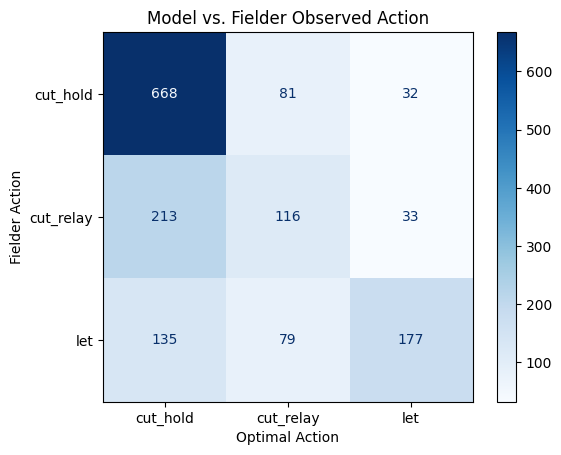

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
che = confusion_matrix(design_matrix['optimal_action'], design_matrix['cutoff_decision'], labels = ['cut_hold', 'cut_relay', 'let'])

disp = ConfusionMatrixDisplay(confusion_matrix=che, display_labels=['cut_hold', 'cut_relay', 'let'])
disp.plot(cmap='Blues')
plt.title("Model vs. Fielder Observed Action")
plt.xlabel("Optimal Action")
plt.ylabel("Fielder Action")
plt.show()

In [11]:
check = design_matrix[(design_matrix['optimal_action'] == 'cut_relay') & (design_matrix['cutoff_decision'] == 'cut and hold')]
check['diff'] = check['cut_hold'] - check['cut_relay']
#check[(check['diff'] < 0.2) & (check['diff'] > 0.1)].sort_values(by='diff', ascending=False)

/var/folders/xm/kp9s55y5457c5q6q9t1jvj140000gn/T/ipykernel_1239/3028667817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check['diff'] = check['cut_hold'] - check['cut_relay']


In [12]:
# y2_d074.5_VZE_YJD play 76 good example of not aggressive enough 

In [13]:
speeds = pd.read_csv('runner_speeds.csv')
speeds

,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s
0,IAQ-1783,12,31.181173,30.444060
1,UEX-1111,3,30.814254,29.940639
2,IKJ-2180,9,29.627385,29.361257
3,RZQ-0385,18,30.877511,29.338936
4,XFE-2484,7,31.002160,29.190104
...,...,...,...,...
554,DMS-2354,4,22.086200,20.794230
555,XFE-1704,3,20.604365,20.465668
556,POW-2533,3,21.471650,20.105755
557,KIR-1477,3,18.968475,18.730684


In [108]:
design_full = design_matrix.merge(speeds, left_on = 'baserunner_player_id', right_on='player_id', how='left')

design_full['pct90_speed_ft_per_s'] = design_full['pct90_speed_ft_per_s'].fillna(design_full['pct90_speed_ft_per_s'].mean())

design_full['speed_plus'] = 100 * design_full['pct90_speed_ft_per_s'] / design_full['pct90_speed_ft_per_s'].mean()

design_full


,game_str,play_id,timestamp,baserunner_player_id,from_base,to_base,runner_x,runner_y,runner_dist_to_base,cutoff_x,cutoff_y,cutoff_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,asplus,optimal_action,cutoff_decision,let,cut_hold,cut_relay,safe_probability,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,speed_plus
0,y1_d001_CGA_QEA,108,4098455,CGA-1824,Home,2B,35.7615,110.5899,39.346871,41.7405,194.3859,79.266190,94.4808,338.4810,231.626499,114.200733,let,cut_relay,3.028173,3.253,3.154183,0.996948,CGA-1824,7.0,28.322210,27.656672,104.619656
1,y1_d001_CGA_QEA,114,4231155,CGA-1353,Home,2B,61.1802,61.2882,89.783392,25.8921,137.6235,27.986775,139.5966,299.0814,221.583436,107.931899,cut_hold,cut_hold,0.564000,0.564,0.553682,0.978368,CGA-1353,3.0,23.617302,22.445863,84.908207
2,y1_d001_CGA_QEA,216,8333280,CGA-1929,Home,2B,56.9868,46.3326,98.766010,11.6007,132.4140,12.801861,188.1207,245.4093,222.283963,107.931899,cut_relay,cut_hold,1.563890,1.564,1.474566,0.812507,CGA-1929,3.0,28.405855,27.655517,104.615287
3,y1_d002_CGA_QEA,92,3087421,QEA-0252,Home,2B,57.1884,47.2554,98.131108,-55.6794,140.5182,57.296922,-200.5506,236.1000,228.305395,94.428842,cut_relay,cut_relay,2.245454,2.253,1.818625,0.928305,QEA-0252,27.0,28.366512,24.333189,92.047583
4,y1_d003_CGA_QEA,92,3994106,QEA-0249,Home,2B,59.4930,72.1209,80.939068,18.4110,161.4603,39.070157,69.6903,327.1002,211.888716,99.976237,cut_hold,cut_hold,0.564000,0.564,0.544133,0.958351,QEA-0249,49.0,27.627580,26.671594,100.893301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,y2_d094_QZE_RZQ,341,11657364,RZQ-0231,2B,Home,-61.2816,60.3006,85.974397,-2.8077,26.1333,26.283694,-2.0037,243.5127,243.520943,79.783048,cut_relay,cut_relay,1.797885,1.873,1.511510,0.951756,RZQ-0231,77.0,28.361251,26.829093,101.489089
1530,y2_d094_QZE_RZQ,344,11857564,RZQ-0310,2B,Home,-13.8180,9.9936,17.053128,2.4942,88.6911,88.726164,233.5866,234.6720,331.109721,67.227633,cut_relay,cut_hold,3.225163,3.253,3.134493,1.000000,RZQ-0310,87.0,30.062055,28.691501,108.534205
1531,y2_d095_QZE_RZQ,97,2945498,RZQ-0409,2B,Home,-60.0858,78.1305,98.563068,-5.2521,51.3606,51.628440,-100.2816,242.7507,262.648628,121.537404,cut_relay,cut_relay,1.648359,1.873,1.625700,0.855722,RZQ-0409,46.0,29.710083,28.026794,106.019754
1532,y2_d095_QZE_RZQ,261,8351098,QZE-2357,2B,Home,-38.8740,30.2727,49.270927,90.5235,113.6388,145.286892,230.5521,250.0368,340.106854,107.228895,cut_hold,cut_hold,2.252996,2.253,2.247488,0.999998,QZE-2357,12.0,27.535706,27.071918,102.407648


In [109]:
design_full['basepath'] = design_full['from_base'] + '_to_' + design_full['to_base']

base_dummies = pd.get_dummies(design_full[['basepath']], prefix = 'is')

design_full_encoded = pd.concat([design_full, base_dummies], axis=1)
design_full_encoded


,game_str,play_id,timestamp,baserunner_player_id,from_base,to_base,runner_x,runner_y,runner_dist_to_base,cutoff_x,cutoff_y,cutoff_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,asplus,optimal_action,cutoff_decision,let,cut_hold,cut_relay,safe_probability,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,speed_plus,basepath,is_1B_to_3B,is_1B_to_Home,is_2B_to_Home,is_Home_to_2B,is_Home_to_3B
0,y1_d001_CGA_QEA,108,4098455,CGA-1824,Home,2B,35.7615,110.5899,39.346871,41.7405,194.3859,79.266190,94.4808,338.4810,231.626499,114.200733,let,cut_relay,3.028173,3.253,3.154183,0.996948,CGA-1824,7.0,28.322210,27.656672,104.619656,Home_to_2B,False,False,False,True,False
1,y1_d001_CGA_QEA,114,4231155,CGA-1353,Home,2B,61.1802,61.2882,89.783392,25.8921,137.6235,27.986775,139.5966,299.0814,221.583436,107.931899,cut_hold,cut_hold,0.564000,0.564,0.553682,0.978368,CGA-1353,3.0,23.617302,22.445863,84.908207,Home_to_2B,False,False,False,True,False
2,y1_d001_CGA_QEA,216,8333280,CGA-1929,Home,2B,56.9868,46.3326,98.766010,11.6007,132.4140,12.801861,188.1207,245.4093,222.283963,107.931899,cut_relay,cut_hold,1.563890,1.564,1.474566,0.812507,CGA-1929,3.0,28.405855,27.655517,104.615287,Home_to_2B,False,False,False,True,False
3,y1_d002_CGA_QEA,92,3087421,QEA-0252,Home,2B,57.1884,47.2554,98.131108,-55.6794,140.5182,57.296922,-200.5506,236.1000,228.305395,94.428842,cut_relay,cut_relay,2.245454,2.253,1.818625,0.928305,QEA-0252,27.0,28.366512,24.333189,92.047583,Home_to_2B,False,False,False,True,False
4,y1_d003_CGA_QEA,92,3994106,QEA-0249,Home,2B,59.4930,72.1209,80.939068,18.4110,161.4603,39.070157,69.6903,327.1002,211.888716,99.976237,cut_hold,cut_hold,0.564000,0.564,0.544133,0.958351,QEA-0249,49.0,27.627580,26.671594,100.893301,Home_to_2B,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,y2_d094_QZE_RZQ,341,11657364,RZQ-0231,2B,Home,-61.2816,60.3006,85.974397,-2.8077,26.1333,26.283694,-2.0037,243.5127,243.520943,79.783048,cut_relay,cut_relay,1.797885,1.873,1.511510,0.951756,RZQ-0231,77.0,28.361251,26.829093,101.489089,2B_to_Home,False,False,True,False,False
1530,y2_d094_QZE_RZQ,344,11857564,RZQ-0310,2B,Home,-13.8180,9.9936,17.053128,2.4942,88.6911,88.726164,233.5866,234.6720,331.109721,67.227633,cut_relay,cut_hold,3.225163,3.253,3.134493,1.000000,RZQ-0310,87.0,30.062055,28.691501,108.534205,2B_to_Home,False,False,True,False,False
1531,y2_d095_QZE_RZQ,97,2945498,RZQ-0409,2B,Home,-60.0858,78.1305,98.563068,-5.2521,51.3606,51.628440,-100.2816,242.7507,262.648628,121.537404,cut_relay,cut_relay,1.648359,1.873,1.625700,0.855722,RZQ-0409,46.0,29.710083,28.026794,106.019754,2B_to_Home,False,False,True,False,False
1532,y2_d095_QZE_RZQ,261,8351098,QZE-2357,2B,Home,-38.8740,30.2727,49.270927,90.5235,113.6388,145.286892,230.5521,250.0368,340.106854,107.228895,cut_hold,cut_hold,2.252996,2.253,2.247488,0.999998,QZE-2357,12.0,27.535706,27.071918,102.407648,2B_to_Home,False,False,True,False,False


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

features = ['fielder_dist_to_base', 'runner_dist_to_base', 'cutoff_dist_to_base', 
            'asplus', 'pct90_speed_ft_per_s'] + list(base_dummies.columns)
            
label = 'optimal_action' 

X = design_full_encoded[features]
y = design_full_encoded[label]
indices = design_full_encoded.index

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, indices, test_size=0.25, stratify=y, random_state=42
)
model = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

              precision    recall  f1-score   support

    cut_hold       0.70      0.88      0.78       195
   cut_relay       0.67      0.49      0.57        91
         let       0.71      0.53      0.61        98

    accuracy                           0.70       384
   macro avg       0.69      0.63      0.65       384
weighted avg       0.70      0.70      0.69       384



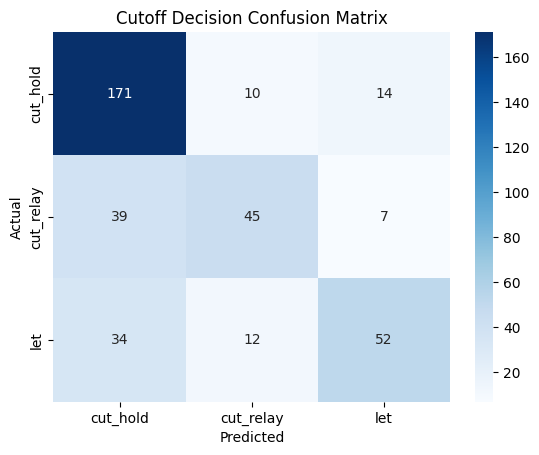

In [111]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Cutoff Decision Confusion Matrix")
plt.show()

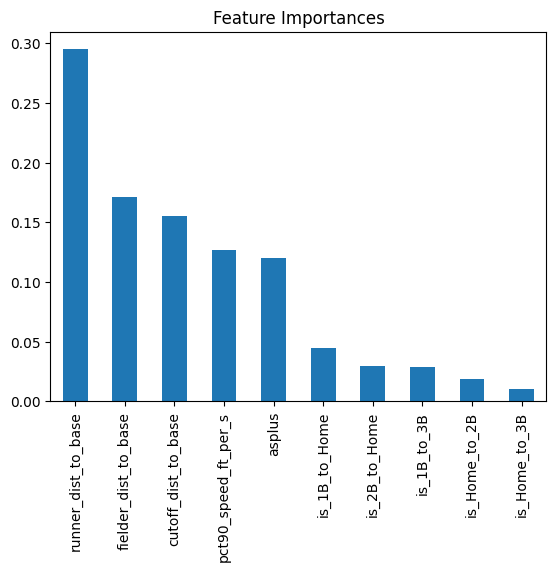

In [112]:
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)
feat_importance.plot(kind='bar', title='Feature Importances')
plt.show()


In [113]:
pd.Series(y_pred).value_counts().sort_index()

cut_hold     244
cut_relay     67
let           73
Name: count, dtype: int64

In [99]:
# with_preds = X_test.assign(pred_optimal = y_pred,
#                            optimal_action=y_test.values)
# with_preds

results_df = design_full_encoded.loc[idx_test].copy()
results_df['model_prediction'] = y_pred
results_df

,game_str,play_id,timestamp,baserunner_player_id,from_base,to_base,runner_x,runner_y,runner_dist_to_base,cutoff_x,cutoff_y,cutoff_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,asplus,optimal_action,cutoff_decision,let,cut_hold,cut_relay,safe_probability,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,speed_plus,basepath,is_1B_to_3B,is_1B_to_Home,is_2B_to_Home,is_Home_to_2B,is_Home_to_3B,model_prediction
884,y2_d046.5_IHI_YJD,188,5636632,YJD-0345,1B,3B,-47.2503,100.2615,40.121771,39.1911,187.2468,160.788296,93.1842,368.8755,343.165471,120.255633,cut_relay,cut_relay,2.114985,2.253,1.991813,0.999654,YJD-0345,141.0,30.291783,28.293359,107.028113,1B_to_3B,True,False,False,False,False,let
306,y2_d013_RQJ_YJD,209,1630812,RQJ-2500,Home,2B,56.8944,84.5877,70.963201,-54.2910,57.4785,88.208569,-186.9141,181.8987,194.809517,117.425221,cut_hold,cut_hold,1.253000,1.253,1.225127,0.973085,RQJ-2500,8.0,27.837273,27.760214,105.011332,Home_to_2B,False,False,False,True,False,cut_hold
97,y1_d048_STK_QEA,118,3836605,STK-1713,Home,2B,55.1898,43.4733,100.113054,57.6396,122.3472,57.827087,211.9938,246.4656,243.338038,107.931899,cut_relay,let,2.218485,2.253,2.068361,0.804733,STK-1713,5.0,27.502505,27.233820,103.020090,Home_to_2B,False,False,False,True,False,cut_relay
1123,y2_d054_PTB_YJD,185,5752730,YJD-0185,1B,Home,-54.1491,91.5228,106.341657,-45.5562,186.2136,191.705170,-68.6424,377.8176,384.002497,88.141924,cut_hold,cut_hold,3.168986,3.253,3.245035,0.950983,YJD-0185,85.0,28.267859,26.562182,100.479419,1B_to_Home,False,True,False,False,False,cut_hold
1245,y1_d051_UPU_YJD,322,10474492,UPU-2411,2B,Home,-31.5735,21.8697,38.407938,-63.8340,105.2067,123.057829,-146.0895,154.2327,212.437915,117.425221,cut_hold,cut_hold,1.235891,1.236,1.236000,0.999905,NaN,NaN,NaN,26.435446,100.000000,2B_to_Home,False,False,True,False,False,cut_hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,y1_d088_CRQ_QEA,271,9201063,CRQ-2066,Home,2B,45.1107,104.8371,50.261013,-47.0145,207.2403,92.999295,-85.9713,377.7270,265.056773,114.200733,cut_hold,cut_relay,2.196622,2.253,2.249024,0.995793,CRQ-2066,4.0,26.296912,25.742929,97.380350,Home_to_2B,False,False,False,True,False,cut_hold
1353,y1_d099_MRJ_YJD,186,6674767,NaN,2B,Home,-25.9071,19.0956,32.184154,11.4825,175.6155,175.990487,89.9745,375.3705,386.003138,113.036169,cut_hold,cut_relay,3.238995,3.253,3.205465,1.000000,NaN,NaN,NaN,26.435446,100.000000,2B_to_Home,False,False,True,False,False,cut_hold
1355,y2_d002_BEJ_RZQ,159,5705726,RZQ-0040,2B,Home,-60.2568,56.1159,82.340004,-68.0502,74.2584,100.723084,-29.8737,249.1053,250.890192,100.730489,cut_relay,cut_hold,2.218514,2.253,1.852889,0.979880,RZQ-0040,80.0,27.584712,25.822769,97.682368,2B_to_Home,False,False,True,False,False,cut_hold
1466,y2_d063_KIR_RZQ,225,7311287,RZQ-0415,2B,Home,-52.6761,43.0101,68.004707,-3.9747,118.5273,118.593925,-59.9655,269.6445,276.231819,105.871951,cut_hold,cut_hold,1.871905,1.873,1.791670,0.999297,RZQ-0415,30.0,29.409197,26.877311,101.671487,2B_to_Home,False,False,True,False,False,cut_hold


In [79]:
# design_full_encoded['model_prediction'] = model.predict(design_full_encoded[features])

# design_full_encoded


In [80]:
# checker = design_full_encoded[['game_str', 'play_id', 'baserunner_player_id', 'from_base', 'to_base', 'optimal_action', 'cutoff_decision', 'model_prediction']]
# checker['match'] = checker['optimal_action'] == checker['model_prediction']

# checker[checker['optimal_action'] == '']

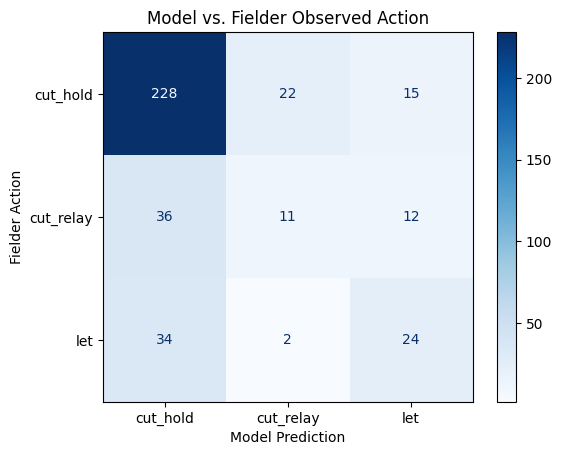

In [114]:
cm = confusion_matrix(results_df['cutoff_decision'], results_df['model_prediction'], labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Model vs. Fielder Observed Action")
plt.xlabel("Model Prediction")
plt.ylabel("Fielder Action")
plt.show()

In [117]:
results_df[(results_df['model_prediction'] == 'cut_hold') & (results_df['cutoff_decision'] == 'let')].sort_values('safe_probability')

,game_str,play_id,timestamp,baserunner_player_id,from_base,to_base,runner_x,runner_y,runner_dist_to_base,cutoff_x,cutoff_y,cutoff_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,asplus,optimal_action,cutoff_decision,let,cut_hold,cut_relay,safe_probability,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,speed_plus,basepath,is_1B_to_3B,is_1B_to_Home,is_2B_to_Home,is_Home_to_2B,is_Home_to_3B,model_prediction
261,y1_d099_MRJ_YJD,121,4208767,YJD-0340,Home,2B,33.8316,26.5038,106.038028,-0.0411,-0.6588,127.658807,147.1152,235.9113,183.042491,105.268037,cut_relay,let,2.130537,2.253,2.003300,0.800391,YJD-0340,58.0,28.217348,26.748809,101.185390,Home_to_2B,False,False,False,True,False,cut_hold
25,y1_d014_IXC_QEA,45,1526967,QEA-0364,Home,2B,27.0531,23.1390,107.326500,2.2404,-2.1105,129.129937,0.7059,277.2552,150.256858,92.992910,let,let,1.451636,1.564,1.479005,0.821813,QEA-0364,25.0,26.970532,26.444167,100.032993,Home_to_2B,False,False,False,True,False,cut_hold
84,y1_d046_MHY_RZQ,155,4908719,RZQ-0038,Home,2B,59.7615,58.0080,91.276136,15.1704,176.7630,52.024006,50.6991,376.8081,254.900933,104.951998,let,let,3.045367,3.253,3.173576,0.916551,NaN,NaN,NaN,26.435446,100.000000,Home_to_2B,False,False,False,True,False,cut_hold
1379,y2_d012_RQJ_YJD,205,6604314,RQJ-2478,2B,Home,-55.3602,81.2673,98.331713,0.7035,-0.0096,0.703565,-3.5787,278.1321,278.155122,113.036169,cut_hold,let,1.465044,1.564,1.491697,0.923349,RQJ-2478,7.0,28.284318,26.831323,101.497526,2B_to_Home,False,False,True,False,False,cut_hold
768,y1_d099_MRJ_YJD,121,4208767,YJD-0166,1B,3B,23.2878,110.7549,98.874952,-0.0411,-0.6588,90.438685,147.1152,235.9113,272.204253,105.268037,cut_relay,let,2.130537,2.253,2.003300,0.924507,YJD-0166,41.0,27.532369,25.945734,98.147521,1B_to_3B,True,False,False,False,False,cut_hold
36,y1_d021_JFU_YJD,20,593748,YJD-0281,Home,2B,61.0791,62.8488,88.577835,-55.9098,164.6340,67.396021,-84.0840,348.0540,236.505793,115.228537,let,let,2.512549,3.253,3.169187,0.927368,YJD-0281,16.0,26.801667,26.442559,100.026909,Home_to_2B,False,False,False,True,False,cut_hold
741,y1_d091_DYE_RZQ,78,2501199,RZQ-0347,1B,3B,-22.8531,116.5614,66.815012,-0.0630,2.2920,88.349375,127.8357,176.3790,222.200418,97.039724,cut_hold,let,1.867446,1.873,1.825731,0.939862,RZQ-0347,139.0,29.131157,27.983361,105.855454,1B_to_3B,True,False,False,False,False,cut_hold
1260,y1_d057_OXG_QEA,146,4096327,NaN,2B,Home,-61.0764,62.6331,87.482752,0.0693,2.0502,2.051371,-38.6475,247.5033,250.502520,126.292996,cut_hold,let,1.802070,1.873,1.824206,0.954444,NaN,NaN,NaN,26.435446,100.000000,2B_to_Home,False,False,True,False,False,cut_hold
1523,y2_d092_NYA_YJD,260,9405959,YJD-0366,2B,Home,-59.8158,58.6497,83.771817,0.3093,0.8241,0.880231,-15.4125,236.8392,237.340161,117.919454,cut_relay,let,1.803991,1.873,1.573689,0.955678,YJD-0366,85.0,28.824737,26.689667,100.961670,2B_to_Home,False,False,True,False,False,cut_hold
9,y1_d006_JJS_YJD,163,5334253,JJS-1625,Home,2B,60.7098,66.8736,85.445092,0.3216,-5.0157,132.016092,-176.7309,174.6540,183.042931,117.425221,let,let,0.739143,2.253,2.011932,0.957852,NaN,NaN,NaN,26.435446,100.000000,Home_to_2B,False,False,False,True,False,cut_hold


In [118]:
# y1_d014_IXC_QEA play 45 ideal example of why to cut

In [119]:
design_full[design_full['game_str'] == 'y1_d014_IXC_QEA'].loc[design_full['play_id'] == 45]

,game_str,play_id,timestamp,baserunner_player_id,from_base,to_base,runner_x,runner_y,runner_dist_to_base,cutoff_x,cutoff_y,cutoff_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,asplus,optimal_action,cutoff_decision,let,cut_hold,cut_relay,safe_probability,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,speed_plus,basepath
25,y1_d014_IXC_QEA,45,1526967,QEA-0364,Home,2B,27.0531,23.1390,107.326500,2.2404,-2.1105,129.129937,0.7059,277.2552,150.256858,92.99291,let,let,1.451636,1.564,1.479005,0.821813,QEA-0364,25.0,26.970532,26.444167,100.032993,Home_to_2B
1164,y1_d014_IXC_QEA,45,1526967,QEA-0180,2B,Home,-51.4158,84.6534,99.044347,2.2404,-2.1105,3.077922,0.7059,277.2552,277.256099,92.99291,let,let,1.451636,1.564,1.479005,0.912963,QEA-0180,28.0,27.633565,24.466263,92.550976,2B_to_Home
